# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

## 0. Parameters <a name="parameters"></a>

In [2]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [51]:
(x_1, y_1), (x_2, y_2) = datasets.cifar10.load_data()

In [52]:
x_tot = np.concatenate((x_1, x_2), axis=0)
y_tot = np.concatenate((y_1, y_2), axis=0)

train_test_ratio = float(1.0/6.0)
sample_size = x_tot.shape[0]
print(sample_size)
split_idx = math.ceil(sample_size*train_test_ratio)

x_train = x_tot[:split_idx]
y_train = y_tot[:split_idx]

x_test = x_tot[split_idx:]
y_test = y_tot[split_idx:]

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

60000
(10000, 32, 32, 3)
(10000, 1)
(50000, 32, 32, 3)
(50000, 1)


In [53]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

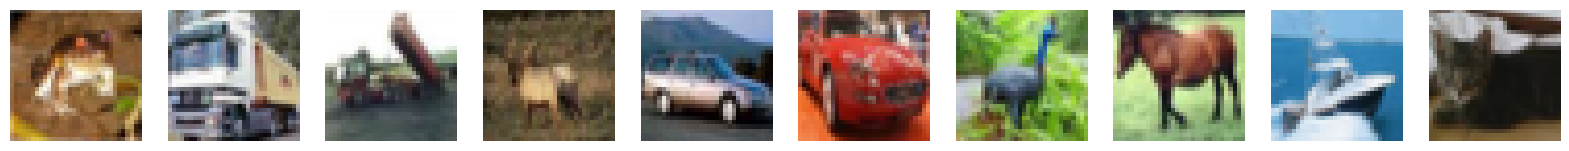

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [45]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model <a name="build"></a>

In [57]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## 3. Train the model <a name="train"></a>

In [58]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [68]:
model.fit(x_train, y_train, batch_size=32, epochs=20, shuffle=True)

Epoch 1/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9720
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1343 - accuracy: 0.9590
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1748 - accuracy: 0.9407
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1426 - accuracy: 0.9518
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1997 - accuracy: 0.9317
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1291 - accuracy: 0.9579
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1012 - accuracy: 0.9713
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0927 - accuracy: 0.9737
Epoch 9/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1517 - accuracy: 0.9485
Epoch 10/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1440 - accuracy: 0.9511

## 4. Evaluation <a name="evaluate"></a>

In [71]:
model.evaluate(x_test, y_test)

1563/1563 [==============================] - 2s 976us/step - loss: 5.5299 - accuracy: 0.4135


[5.529914855957031, 0.4134800136089325]

In [72]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_train)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_train, axis=-1)]

313/313 [==============================] - 0s 668us/step


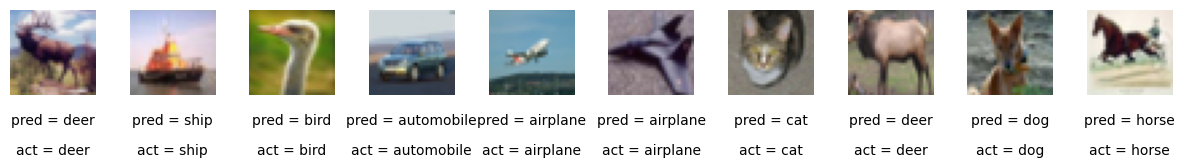

In [74]:
n_to_show = 10
indices = np.random.choice(range(len(x_train)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_train[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)